<a href="https://colab.research.google.com/github/ZulKM/Task-Colledge/blob/main/Klasifikasi_K_NN%20(Hamming%20Distance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Untuk Import Data Setnya

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
dataset = pd.read_csv('Social_Network.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [80]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'hamming', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
y_pred = classifier.predict(x_test)

In [83]:
print (x_test)

[[-0.43535432 -0.52748354]
 [-0.1464556  -0.64862808]
 [ 1.39433756  0.83539258]
 [ 0.52764141 -0.95148944]
 [ 0.72024055  0.92625099]
 [-0.91685218  0.32052827]
 [-1.30205047  0.10852532]
 [-1.2057509   0.38110054]
 [-0.43535432 -0.4971974 ]
 [-1.30205047  1.25939849]
 [ 0.62394098 -1.64807057]
 [-1.59094919 -1.46635375]
 [-0.43535432  0.01766691]
 [-0.43535432 -1.64807057]
 [-0.43535432 -0.46691126]
 [ 0.62394098 -1.07263398]
 [ 0.04614355 -0.04290536]
 [ 0.23874269  0.10852532]
 [-0.33905474 -0.4971974 ]
 [-1.97614748 -0.19433604]
 [-1.8798479   0.16909759]
 [-1.49464961  0.22966986]
 [-0.1464556  -0.52748354]
 [-0.33905474  2.04683802]
 [-0.33905474  0.6839619 ]
 [-1.2057509   1.83483507]
 [-0.91685218 -0.8303449 ]
 [-0.43535432 -0.4971974 ]
 [ 0.81654012  1.65311826]
 [ 1.29803799  0.83539258]
 [-0.62795346  0.13881146]
 [-2.07244705  0.16909759]
 [ 1.87583542  0.19938373]
 [ 1.10543884  1.74397666]
 [-0.43535432 -1.70864284]
 [ 1.20173841  1.13825394]
 [ 0.04614355 -0.52748354]
 

In [84]:
print (y_test)

[0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0]


In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[68  0]
 [76  0]]


For Training 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


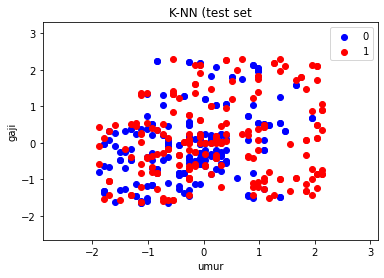

In [86]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('blue', 'red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter (x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('K-NN (test set')
plt.xlabel('umur')
plt.ylabel('gaji')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


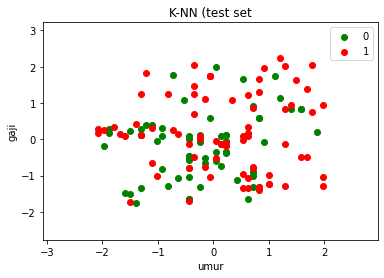

In [87]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('green', 'red')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter (x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('K-NN (test set')
plt.xlabel('umur')
plt.ylabel('gaji')
plt.legend()
plt.show()